In [4]:
import gensim.downloader as api
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.cluster import KMeans
import json

In [5]:
# load in vectors
wv = api.load('glove-wiki-gigaword-50')

In [437]:
# load in top-attended words extracted from a certain level of a circuit
with open('cdt15/cdt15_h2.json', 'r') as fp:
    f = json.load(fp)

In [438]:
# define helpful functions
def vectorize(list_of_words, wv, N):
    features = {}
    dot_sizes = []
    cnt = 0
    
    for item in list_of_words:
        if cnt >= N:
            break
        else:
            w, p = item[0], item[1]
            if w in wv:
                try:
                    features[w] = wv[w]
                    dot_sizes.append(p*100)
                    cnt += 1
                except KeyError:
                    continue
    return features, dot_sizes

def plot2D(result, wordgroups, words, dot_sizes):
    pyplot.scatter(result[:, axes[0]], result[:, axes[1]], s=dot_sizes, color=defaultcolor, alpha=0.3)
    for g, group in enumerate(wordgroups):
        for word in group:
            if not word in words:
                continue
            i = words.index(word)
            # Create plot point
            coord = (result[i, axes[0]], result[i, axes[1]])
            color = colors[g] if g < len(colors) else defaultcolor
            size = sizes[g] if g < len(sizes) else defaultsize
            pyplot.annotate(word, xy=coord, color=color, fontsize=size)
            
            
def get_groups(vecs, clusterK=2):
    groups = []

    # Assign groups if using clustering
    if clusterK > 0:
        estimator = KMeans(init='k-means++', n_clusters=clusterK, n_init=10)
        estimator.fit_predict(list(vecs.values()))
        groups = [[] for n in range(clusterK)]
        for i, w in enumerate(vecs.keys()):
            group = estimator.labels_[i]
            groups[group].append(w)

    return groups

In [439]:
# show top-20 words in the plot
all_fs, dot_sizes = vectorize(f, wv, N=20)

In [440]:
# PCA axes to plot on, the most relevant are [0,1] or [1,2] for 2D and [0,1,2] or [1,2,3] for 3D
axes = [0, 1]

# To differentiate groups in the graph, you can give the labels a corresponding color or font size
# e.g. words in the first group will be red, words in the second group will be blue, etc.

# Color of words in each group, uses default if too many groups
# Dark colors are good for matplotlib's white background, use hex or https://matplotlib.org/gallery/color/named_colors.html
colors = ["tab:red", "tab:blue", "tab:green", "tab:orange",
          "tab:purple", "tab:olive", "tab:pink", "tab:cyan", "tab:gray"]
defaultcolor = "gray"

# Font sizes of words in each group
sizes = []
defaultsize = 15

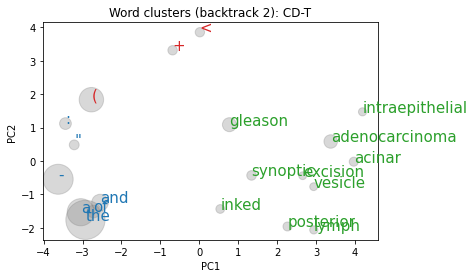

In [474]:
# Get groups from file or by clustering
features = all_fs
groups = get_groups(features, clusterK=3)

coords = list(features.values())

# Create axes to plot on
pca = PCA(n_components=2)
result = pca.fit_transform(coords)

words = list(features.keys())
# Plot vectors on axes
plot2D(result, groups, words, dot_sizes)

pyplot.title("Word clusters (backtrack 2): CD-T")
pyplot.xlabel("PC1")
pyplot.ylabel("PC2")
pyplot.show()

In [443]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[7.99635281 2.90531288]
[0.34240256 0.12440504]
[0.34240256 0.4668076 ]


In [83]:
import numpy as np
exp_ratio = [0.48, 0.55, 0.46, 0.48, 0.48, 0.42, 0.41, 0.48]
print(np.mean(exp_ratio))
print(np.std(exp_ratio))

0.47
0.040311288741492764
